In [2]:
import pathlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid',rc={'figure.figsize':(14,8)})

### Real data (model, grid)

In [3]:
real_files = pathlib.Path('data/real_full/').glob('real*')

real_dfs = [pd.read_csv(file) for file in real_files]

In [4]:
real_per_day = pd.concat(real_dfs)
real_per_day['day'] = pd.to_datetime(real_per_day['day'],  format='%d/%m/%Y')

In [5]:
real_per_day.head()

,ndays,day,nx,ny,LAT,LON,T_MEAN,T_MIN,T_MAX
0,0,2012-01-01,186,227,41.424183,2.052902,10.714199,6.478210,15.079498
1,0,2012-01-01,187,226,41.423294,2.054112,10.638894,6.374451,14.999390
2,0,2012-01-01,187,227,41.424194,2.054099,10.629152,6.385162,14.992401
3,0,2012-01-01,188,215,41.413395,2.055452,9.532638,5.262634,13.994965
4,0,2012-01-01,188,216,41.414295,2.055439,9.619871,5.318481,14.046631


In [6]:
real_per_day = real_per_day.set_index('day')
real_per_day = real_per_day.groupby(real_per_day.index).agg({'T_MEAN': 'mean'})

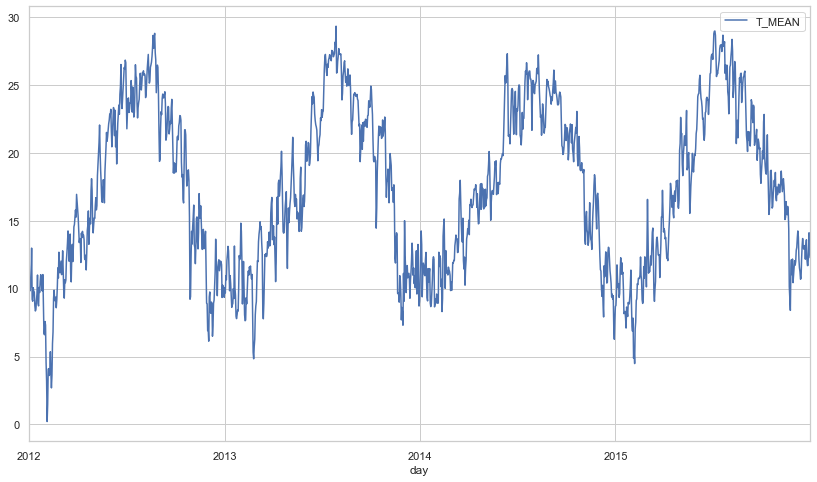

In [7]:
real_per_day.plot()

### Official stations

In [8]:
stations_xls = pd.ExcelFile('data/data_S2_S3_S4.xlsx')

In [9]:
stations_dfs = [stations_xls.parse(sheet) for sheet in stations_xls.sheet_names]

In [10]:
stations_df = pd.concat(stations_dfs)

/home/biel/.conda/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [11]:
stations_df['DATA'] = pd.to_datetime(stations_df['DATA'], format="%Y-%m-%d")

In [12]:
stations_df.head()

,CODI,COMARCA,DATA,DVum10,DVum6,DVx10,DVx6,ESTACIO,HRm,PPT24h,RS24h,Tm,Tn,Tx,VVem10,VVem6,VVx10,VVx6,hPa
0,WU,Barcelonès,2005-09-22,NaN,223.0,NaN,NaN,Badalona - Museu,72.0,0.0,19.5,19.8,15.0,22.9,NaN,NaN,NaN,8.3,NaN
1,WU,Barcelonès,2005-09-23,NaN,220.0,NaN,NaN,Badalona - Museu,77.0,0.0,14.5,21.3,18.2,23.9,NaN,NaN,NaN,7.9,1012.3
2,WU,Barcelonès,2005-09-24,NaN,195.0,NaN,NaN,Badalona - Museu,80.0,0.0,17.0,21.9,19.1,23.5,NaN,NaN,NaN,5.9,1011.8
3,WU,Barcelonès,2005-09-25,NaN,254.0,NaN,NaN,Badalona - Museu,80.0,11.4,11.1,21.0,16.7,24.6,NaN,NaN,NaN,12.0,1009.7
4,WU,Barcelonès,2005-09-26,NaN,11.0,NaN,NaN,Badalona - Museu,74.0,0.2,15.3,19.7,16.8,22.9,NaN,NaN,NaN,6.6,1015.2


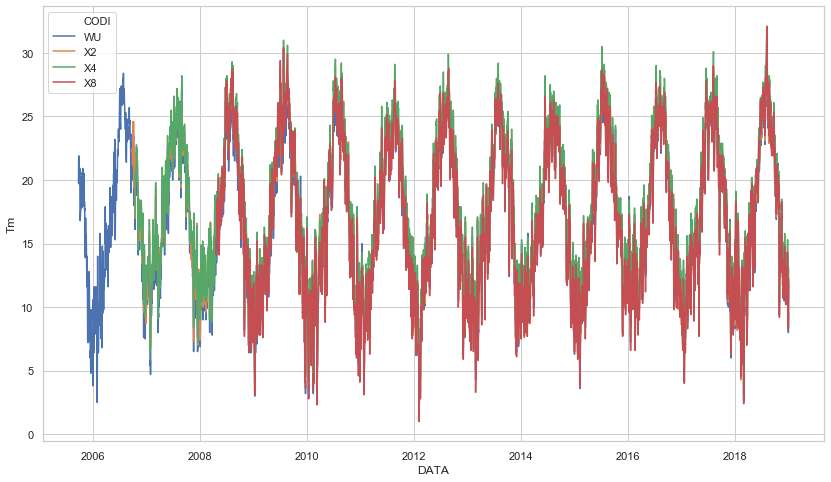

In [13]:
sns.lineplot(x='DATA', y='Tm', hue='CODI', data=stations_df)

In [14]:
stations_mean_df = stations_df.groupby('DATA').agg({'Tm':'mean'})

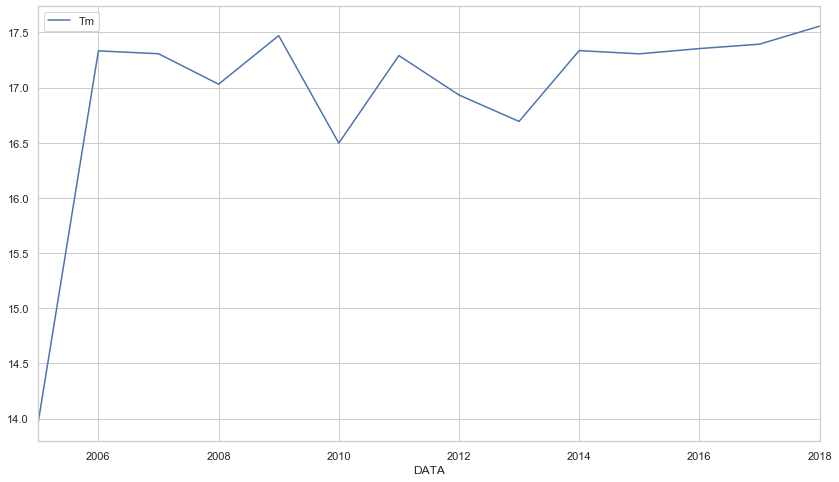

In [17]:
stations_mean_df.groupby(pd.Grouper(freq='y')).mean().plot()

In [19]:
stations_overlaping_real = stations_mean_df.loc[real_per_day.index.min():real_per_day.index.max()]

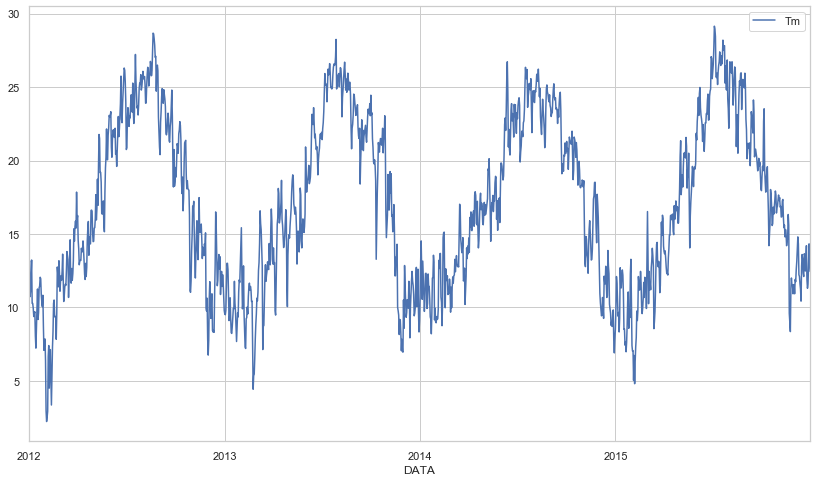

In [20]:
ax1 = stations_overlaping_real.plot()

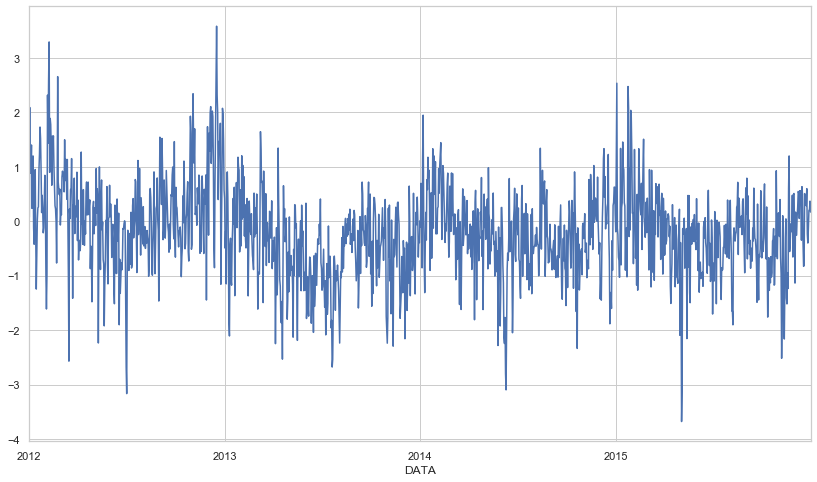

In [21]:
(stations_overlaping_real['Tm'] - real_per_day['T_MEAN']).plot()

In [22]:
df_all = real_per_day.join(stations_overlaping_real)

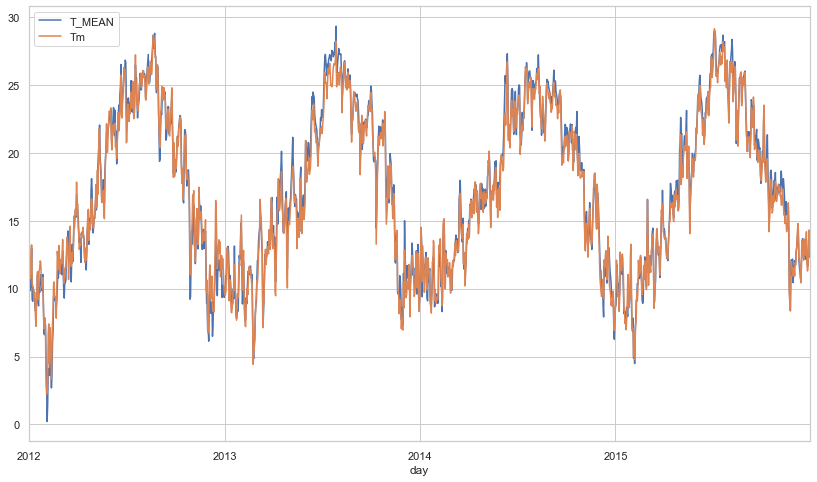

In [23]:
df_all.plot()

## NonOfficial stations

In [24]:
nonofficial_xls = pd.ExcelFile('data/data_NoOfficial.xlsx')

In [31]:
nonofficial_df = nonofficial_xls.parse('Sheet1', index_col=0, decimal=',')

In [32]:
nonofficial_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40379 entries, 0 to 40378
Data columns (total 12 columns):
Date          40379 non-null object
Alt           40379 non-null int64
Temp_Max      40379 non-null float64
Temp_Min      40379 non-null float64
Hum_Max       40379 non-null int64
Hum_Min       40379 non-null int64
Pres_Max      40379 non-null float64
Pres_Min      40379 non-null float64
Wind_Max      40379 non-null object
Prec_Today    40379 non-null object
Prec_Year     38402 non-null object
Station       40379 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 4.0+ MB


In [33]:
nonofficial_df['Date'] = pd.to_datetime(nonofficial_df['Date'],  format='%d/%m/%Y')

In [38]:
nonofficial_by_day = nonofficial_df.groupby(['Date']).mean()

In [39]:
nonofficial_by_day['Temp_mean'] = nonofficial_by_day[['Temp_Max', 'Temp_Min']].mean(axis=1)

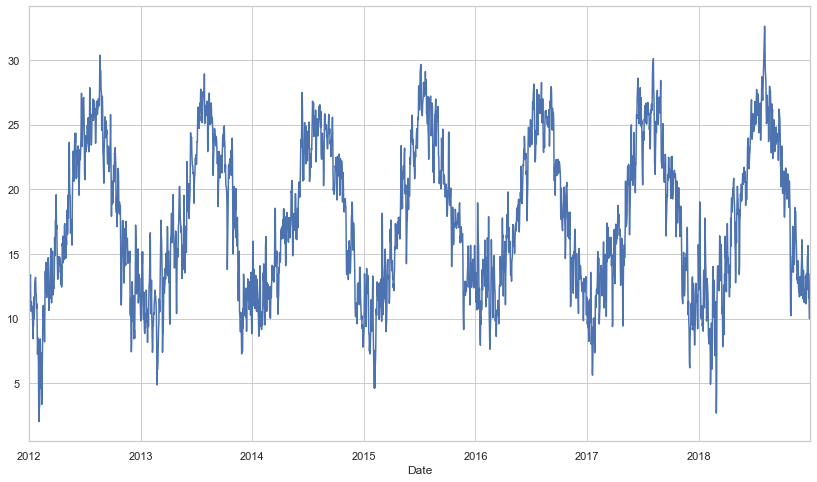

In [41]:
nonofficial_by_day.Temp_mean.plot()

In [43]:
df_all['Temp_Mean'] = nonofficial_by_day.Temp_mean

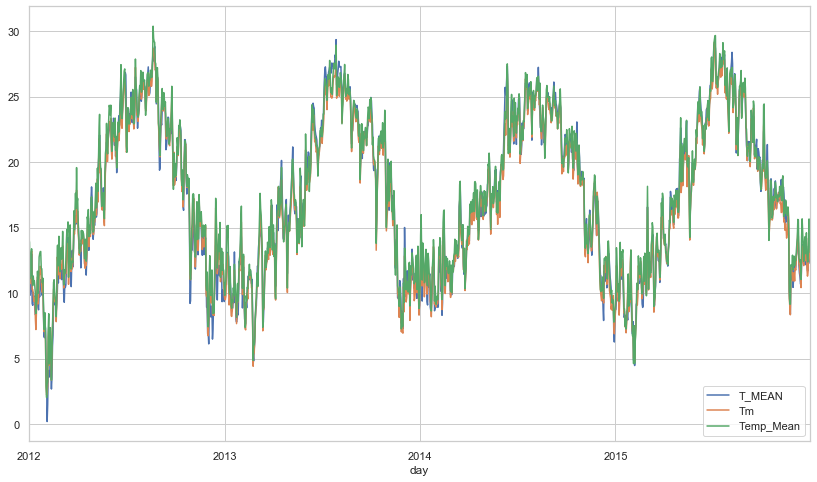

In [45]:
df_all.plot()

In [54]:
stations_df.columns

Index(['CODI', 'COMARCA', 'DATA', 'DVum10', 'DVum6', 'DVx10', 'DVx6',
       'ESTACIO', 'HRm', 'PPT24h', 'RS24h', 'Tm', 'Tn', 'Tx', 'VVem10',
       'VVem6', 'VVx10', 'VVx6', 'hPa'],
      dtype='object')

In [56]:
df_all = df_all.join(stations_df.groupby('DATA').mean()['RS24h'])

In [58]:
df_all.corr()

,T_MEAN,Tm,Temp_Mean,RS24h
T_MEAN,1.000000,0.990669,0.989122,0.628399
Tm,0.990669,1.000000,0.997010,0.631875
Temp_Mean,0.989122,0.997010,1.000000,0.631677
RS24h,0.628399,0.631875,0.631677,1.000000
